In [512]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import scipy.signal
import pandas as pd
import IPython.display as ipd
import matplotlib.colors as mcolors
from scipy.io import wavfile
import librosa
import wave
from scipy.signal import lfilter

In [513]:
SAMPLE_RATE = 20000
data_dir = "../data/"

data_file_list = glob(data_dir + "*.wav")
data_file_list[0]

'../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav'

In [514]:
ipd.Audio(data_file_list[0])

## Reading and Plotting the Raw Neural Data Using the Wave Python Library


input_wav.getframerate() [Sample Rate]: 19531
input_wav.getnframes() [Number of Samples]: 98699
sample_bytes: b'\xa0\xfe`\xfe\xe0\xfe\xe0\xfe`\xff`\x02_\x00`\xff\xdf\x00\xdf\x00\xdf\x01\xa0\x04\xe0\x04`\x03\xe0\x02 \x05\xe0\x04`\x05\xe0\x04\xe0\x02\xa0\x02`\x05`\x04`\x05\xe1\x06\xe1\x06\xa1\x07\xa1\x06a\x07!\x07 \x05 \x05\xe0\x05`\x05\xe0\x05\xa1\x06\xa1\x08!\t!\t\xe1\t\xa2\x0c\xa2\n\xa1\t\xe1\x07a\x08\xa1\x08\xe1\x06!\x06\xa1\t!\n\xa1\x07!\x08!\x06\xa0\x05\xe0\x05`\x05`\x05`\x04\xe0\x04\xa1\x06\xe1\x07\xe1\x06!\x06a\x06!\x07 \x05\xdf\x01\xdf\x00\x9f\x01\xdf\x01\xa0\x02\xa0\x04!\x06\xe1\x07\xe0\x05\xa1\x06a\x06\xe0\x04\xe0\x05\xa0\x04\xe0\x04\xe0\x04\xa1\x06\xe1\x08\xa1\x06!\x06\xa1\x07\xa0\x04\xe0\x03\xe0\x02\xa0\x03a\x06\xe1\x06!\x06\xe0\x04\xe0\x05\xe1\x06\xa1\x06!\x06`\x04\xe0\x03 \x04\xa0\x02\xa0\x02_\x00`\xff\x1f\x00`\xff`\x03 \x05\xa0\x03\xe0\x02\xa0\x02\x9f\x00\xe0\xfe\x1f\x00_\x00\xdf\x00\x9f\x01`\x02\xdf\x00\xa0\xfe\x9f\x00 \xff\xe0\xfe\x9f\x00\x9f\x00_\x01`\x02\x9f\x01\x9f\x

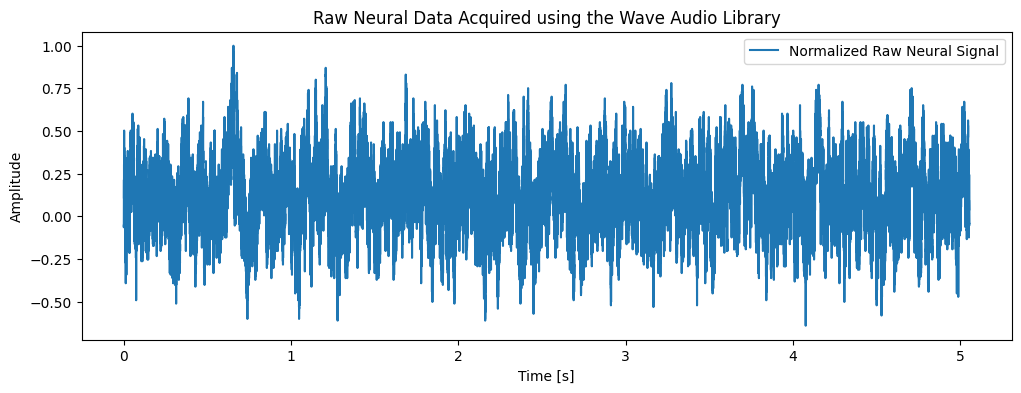

In [515]:
input_wav = wave.open(data_file_list[0], "rb")

print(f"input_wav.getframerate() [Sample Rate]: {input_wav.getframerate()}")
print(f"input_wav.getnframes() [Number of Samples]: {input_wav.getnframes()}")

sample_bytes = input_wav.readframes(input_wav.getnframes())
print(f"sample_bytes: {sample_bytes}")

# Calculating the time of the raw neural signal
time_endpoint = input_wav.getnframes() / input_wav.getframerate()
time_array = np.arange(start=0, stop=time_endpoint, step=(1 / input_wav.getframerate()))

signal_array = np.frombuffer(sample_bytes, dtype=np.int16)

# Normalizing the Array between -1 and 1
signal_array_normalized = signal_array / signal_array.max()

print(f"len(signal_array): {len(signal_array)}")
print(f"len(time_array): {len(time_array)}")

plt.figure(figsize=(12, 4))
plt.plot(time_array, signal_array_normalized)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Raw Neural Data Acquired using the Wave Audio Library")
plt.legend(["Normalized Raw Neural Signal"])
plt.show()

## Reading and Plotting the Raw Neural Data using the Librosa Library


Sample Rate From Librosa: 19531
len(raw_neural_data_bytes): 394796


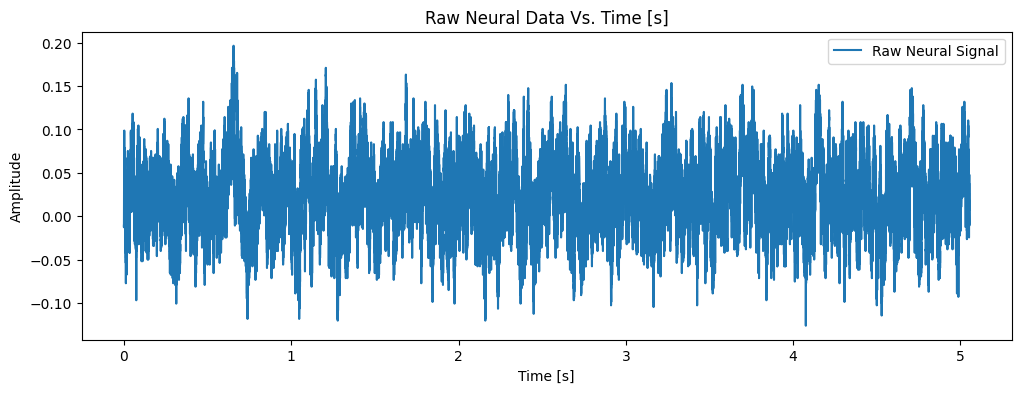

In [516]:
SAMPLE_RATE = 19531
raw_neural_data, sr = librosa.load(data_file_list[0], sr=SAMPLE_RATE)
print(f"Sample Rate From Librosa: {sr}")
raw_neural_data_bytes = raw_neural_data.tobytes()
print(f"len(raw_neural_data_bytes): {len(raw_neural_data_bytes)}")

stop_time = len(raw_neural_data) / SAMPLE_RATE
time = np.arange(0, stop_time, step=(1 / SAMPLE_RATE))

plt.figure(figsize=(12, 4))
plt.plot(time, raw_neural_data)
plt.title("Raw Neural Data Vs. Time [s]")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(["Raw Neural Signal"])
plt.show()

## Reading and plotting the Raw Neural Data using SciPy


In [517]:
filePath = data_file_list[0]
with open(filePath, "rb") as file_to_read:
    wav_bytes = file_to_read.read()
file_to_read.close()

print(f"type(scipy_wav_obj): {type(wav_bytes)}")
scipy_signal_amplitude = np.frombuffer(wav_bytes, dtype=np.int16)
print(f"len(scipy_signal_amplitude): {len(scipy_signal_amplitude)}")

type(scipy_wav_obj): <class 'bytes'>
len(scipy_signal_amplitude): 98721


In [518]:
wavfile.read(data_file_list[0])

(19531, array([-352, -416, -288, ...,  287,  223, -288], dtype=int16))

## Comparing Methods of Reading the Audio Data Including SciPy, Wave, & Librosa


Comparing Array Size:
Librosa loading of data: len(raw_neural_data): 98699
SciPy loading of data: len(raw_audio_array_scipy): 98699
Wave loading of data: len(signal_array): 98699


Comparing Sample Rates:
Sample Rate Librosa: 19531
Sample Rate SciPy: 19531
Sample Rate Wave: 19531


Time in seconds of the raw audio from scipy: 5.0534534842045975


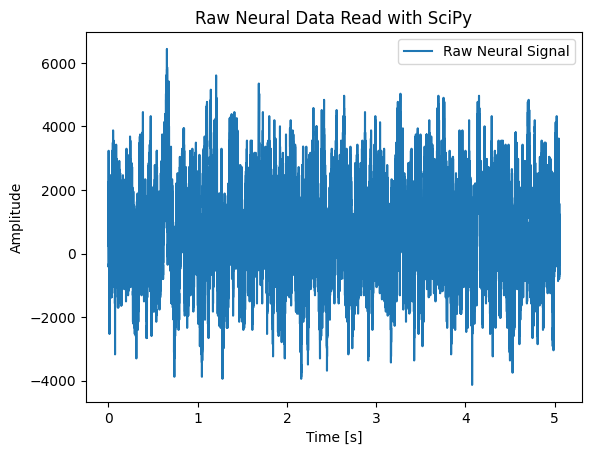

In [519]:
# Testing SciPy
sample_rate_scipy, raw_audio_array_scipy = wavfile.read(data_file_list[0])

# Comparing Array Size
print(f"Comparing Array Size:")
print(f"Librosa loading of data: len(raw_neural_data): {len(raw_neural_data)}")
print(
    f"SciPy loading of data: len(raw_audio_array_scipy): {len(raw_audio_array_scipy)}"
)
print(f"Wave loading of data: len(signal_array): {len(signal_array)}")

print("\n")

# Comparing Sample Rates
print(f"Comparing Sample Rates:")
print(f"Sample Rate Librosa: {sr}")
print(f"Sample Rate SciPy: {sample_rate_scipy}")
print(f"Sample Rate Wave: {input_wav.getframerate()}")

print("\n")

# Plotting the Raw Neural Data read with SciPy
time_end = len(raw_audio_array_scipy) / sample_rate_scipy
print(f"Time in seconds of the raw audio from scipy: {time_end}")

time_raw_audio_array_scipy = np.arange(
    start=0, stop=time_end, step=(1 / sample_rate_scipy)
)

len(time_raw_audio_array_scipy)

plt.plot(time_raw_audio_array_scipy, raw_audio_array_scipy)
plt.title("Raw Neural Data Read with SciPy")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(["Raw Neural Signal"])
plt.show()

## Detrending the Signal of the Raw Neural Data


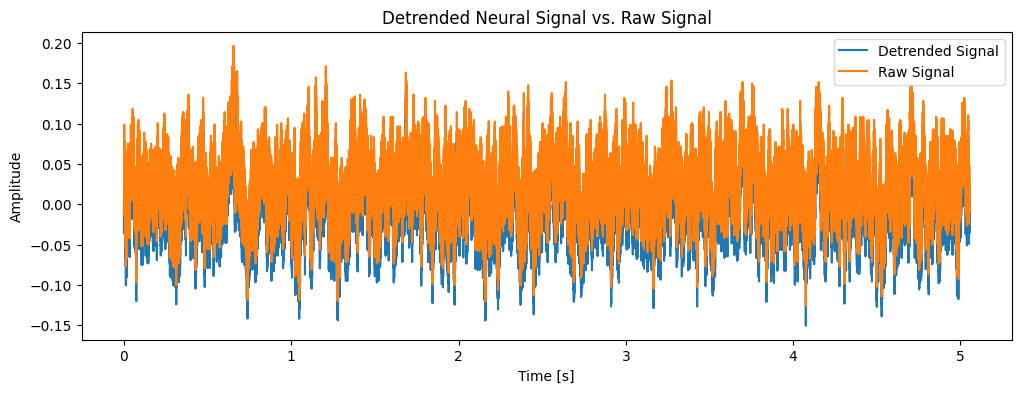

In [520]:
# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(raw_neural_data)

# Plotting the Detrended Signal
plt.figure(figsize=(12, 4))
plt.plot(time, detrend_y, label="Detrended Signal")
plt.plot(time, raw_neural_data, label="Raw Signal")
plt.title("Detrended Neural Signal vs. Raw Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## Frequency Analysis of Raw Neural Data


In [521]:
FFT = np.fft.fft(detrend_y)
half_length_of_the_FFT = int(len(FFT) / 2)

# Creating frequency bins
N = len(FFT)

freq_bins = np.arange(start=0, stop=(sr / 2), step=(sr / N))

print(f"Validating x and y shapes will match: {len(freq_bins) == int(len(FFT)/2)}")

Validating x and y shapes will match: False


In [522]:
psd = FFT * np.conj(FFT) / len(FFT)
psd = psd[0 : len(psd) // 2]

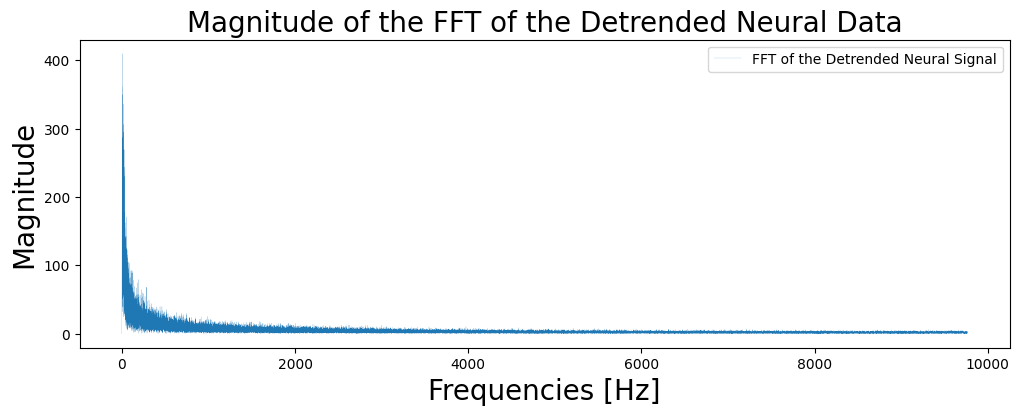

In [523]:
# Plot the Frequency Domain Transform of the Detrended Neural Data
plt.figure(figsize=(12, 4))
plt.plot(
    freq_bins[0 : len(freq_bins) - 1],
    abs(FFT[0 : len(FFT) // 2]),
    label="FFT of the Detrended Neural Signal",
    linewidth=0.1,
)
plt.title("Magnitude of the FFT of the Detrended Neural Data", fontsize=20)
plt.xlabel("Frequencies [Hz]", fontsize=20)
plt.ylabel("Magnitude", fontsize=20)
plt.legend()
plt.show()

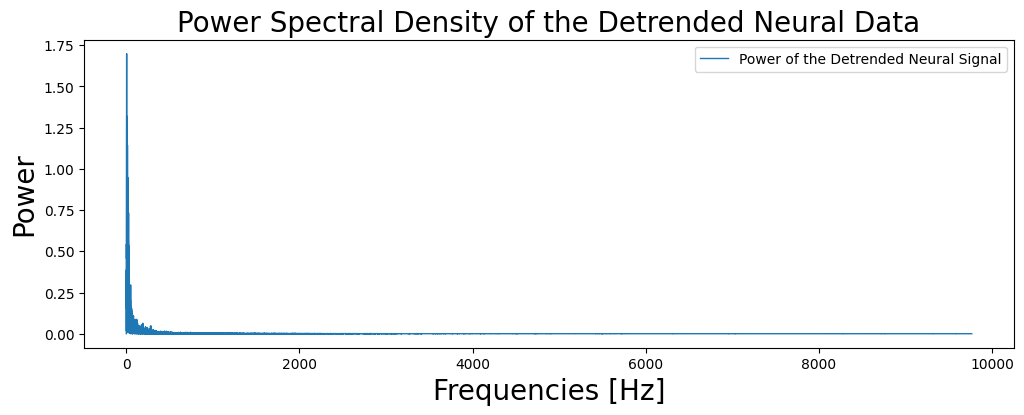

In [524]:
# Plot of the PSD of the Detrended Neural Data
plt.figure(figsize=(12, 4))
plt.plot(
    freq_bins[0 : len(freq_bins) - 1],
    psd,
    label="Power of the Detrended Neural Signal",
    linewidth=1,
)
plt.title("Power Spectral Density of the Detrended Neural Data", fontsize=20)
plt.xlabel("Frequencies [Hz]", fontsize=20)
plt.ylabel("Power", fontsize=20)
plt.legend()
plt.show()

In [525]:
# Sorting the peaks and printing the corresponding indices:
freq_amplitudes = abs(FFT[0 : int(len(FFT) / 2)])
freq_amplitudes_df = pd.DataFrame(freq_amplitudes, columns=["Amplitude"])
freq_amplitudes_df_sorted = freq_amplitudes_df.sort_values(
    by="Amplitude", ascending=False
).head(20)
freq_amplitudes_df_sorted.head()

Amplitude
21  409.473232
22  361.093033
35  349.627481
68  336.017804
27  335.555398

In [526]:
def fft_filter_custom(percentage, freq_bins, FFT):
    threshold = percentage * (2 * abs(FFT[0 : len(FFT) // 2]) / len(freq_bins)).max()
    print(f"threshold: {threshold}")
    filtered_FFT = FFT.copy()
    filtered_FFT_mag = np.abs(filtered_FFT)
    filtered_FFT_mag = 2 * filtered_FFT_mag / len(freq_bins)
    filtered_FFT[filtered_FFT_mag <= threshold] = 0
    return filtered_FFT


# Plotting the thresholded FFT
percentage = 0.25

fft_filtered_custom = fft_filter_custom(percentage, freq_bins, FFT)
time_filtered_custom = np.fft.ifft(fft_filtered_custom)

threshold: 0.00414866496413361


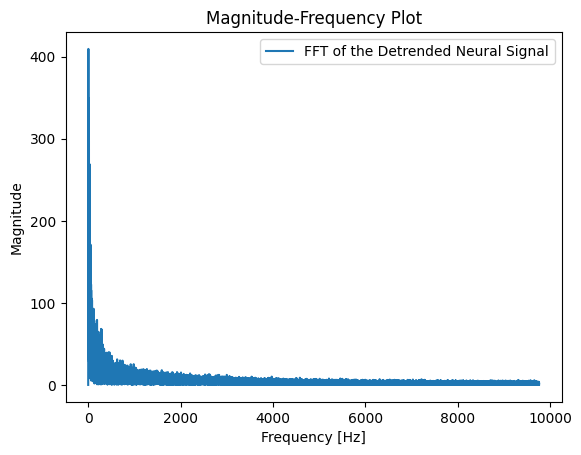

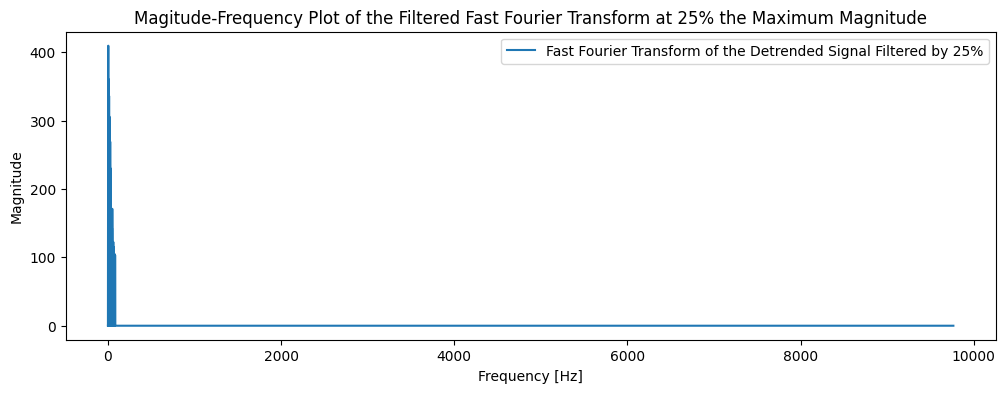

/Volumes/T7/Github/Neuralink-Compression-Challenge/py_encoding_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Volumes/T7/Github/Neuralink-Compression-Challenge/py_encoding_env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


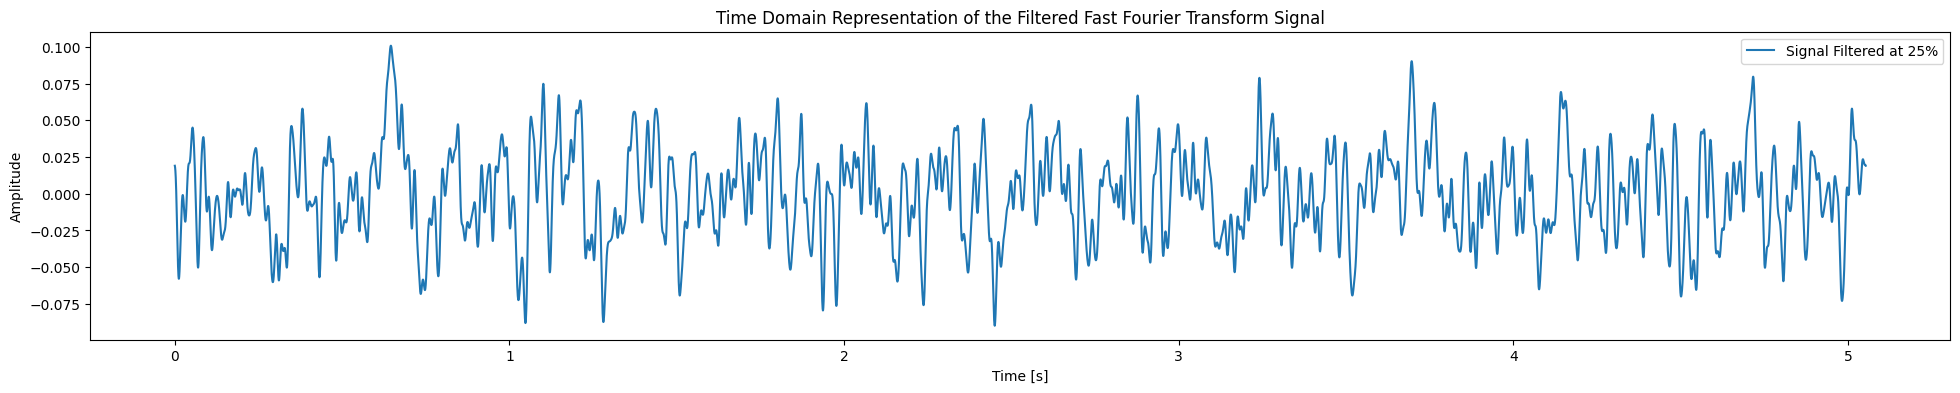

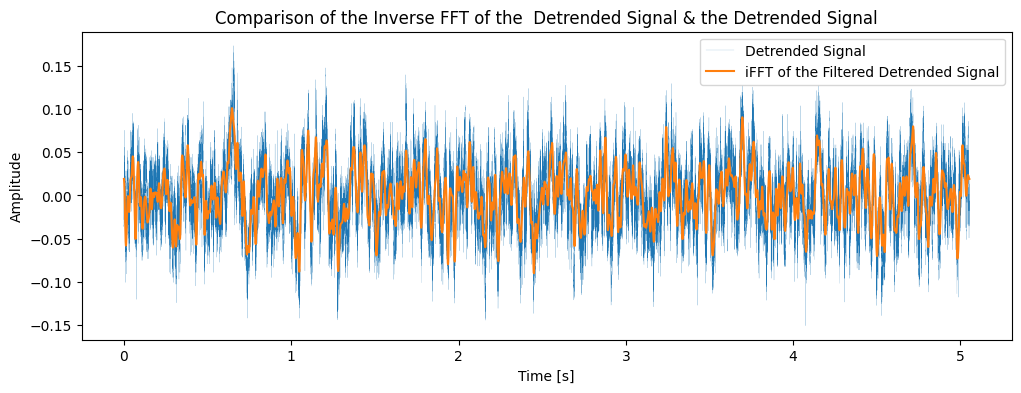

In [527]:
plt.plot(freq_bins[0 : len(freq_bins) - 1], abs(FFT[0 : len(FFT) // 2]))
plt.title("Magnitude-Frequency Plot")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend(["FFT of the Detrended Neural Signal"])
plt.show()

# Magnitude-Frequency Plot of the Filtered Signal
plt.figure(figsize=(12, 4))
plt.plot(
    freq_bins[0 : len(freq_bins) - 1],
    np.abs(fft_filtered_custom[0 : len(fft_filtered_custom) // 2]),
)
plt.title(
    "Magitude-Frequency Plot of the Filtered Fast Fourier Transform at %0.0f%% the Maximum Magnitude"
    % (percentage * 100)
)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend(
    [
        "Fast Fourier Transform of the Detrended Signal Filtered by %0.0f%%"
        % (percentage * 100)
    ]
)
plt.show()

plt.figure(figsize=(24, 4))
plt.plot(time, time_filtered_custom)
plt.title("Time Domain Representation of the Filtered Fast Fourier Transform Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.legend(["Signal Filtered at %0.0f%%" % (percentage * 100)])
plt.show()

iFFT = np.fft.ifft(FFT)
plt.figure(figsize=(12, 4))
plt.plot(time, detrend_y, linewidth=0.1, label="Detrended Signal")
plt.plot(
    time,
    time_filtered_custom,
    label="iFFT of the Filtered Detrended Signal",
)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title(
    "Comparison of the Inverse FFT of the  " + "Detrended Signal & the Detrended Signal"
)
plt.legend()
plt.show()

threshold: 0.00829732992826722


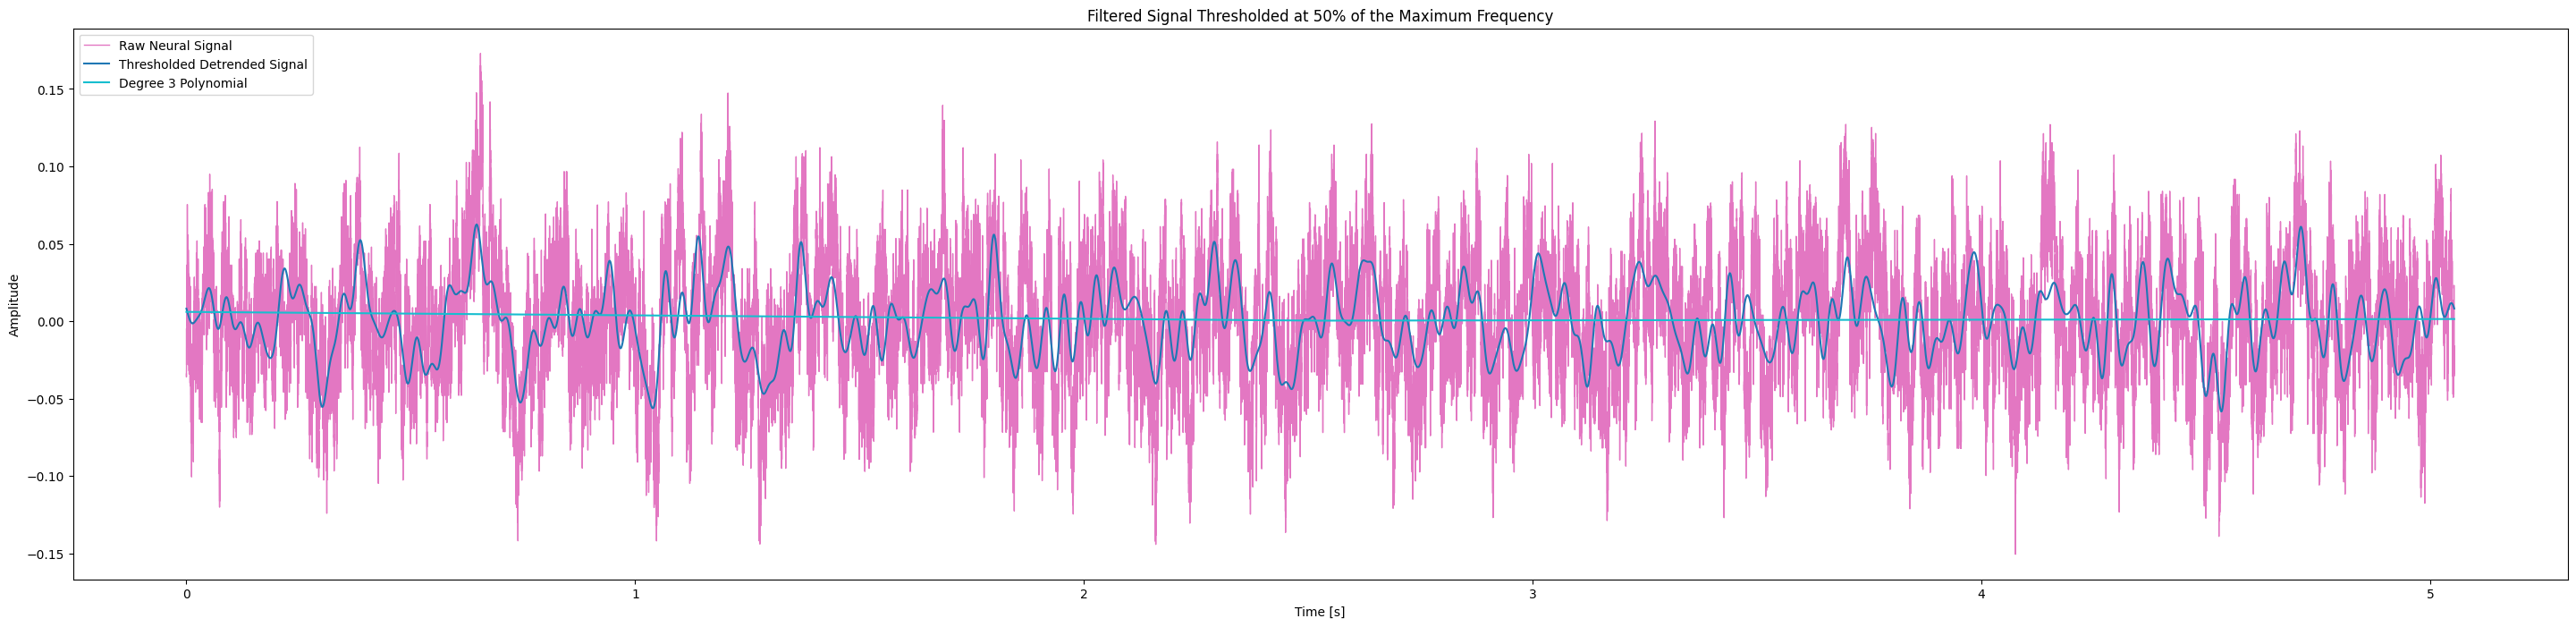

In [528]:
# Defining a Polynomial Regression to identify if the data is detrended.
percentage = 0.5

x = time
y = np.fft.ifft(fft_filter_custom(percentage, freq_bins, FFT))
z = np.polyfit(x, y, 8)
p = np.poly1d(z)
polynomial_degree = 3
xp = np.linspace(0, time[-1], polynomial_degree)

plt.figure(figsize=(36, 8))
plt.plot(
    time,
    detrend_y,
    label="Raw Neural Signal",
    color=list(mcolors.TABLEAU_COLORS.keys())[6],
    linewidth=1,
)

plt.plot(
    x,
    y,
    color=list(mcolors.TABLEAU_COLORS.keys())[0],
    label="Thresholded Detrended Signal",
)

plt.plot(
    xp,
    p(xp),
    color=list(mcolors.TABLEAU_COLORS.keys())[9],
    label="Degree %i Polynomial" % polynomial_degree,
)

plt.title(
    "Filtered Signal Thresholded at %0.0f%% of the Maximum Frequency"
    % (percentage * 100)
)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(loc="upper left")
plt.show()

In [529]:
print(time_filtered_custom.shape)
print(time.shape)

(98699,)
(98699,)


In [530]:
time_filtered_custom_bytes = time_filtered_custom.tobytes()

## Selecting a new threshold to filter the signal.


input_wav.getframerate() [Sample Rate]: 19531
input_wav.getnframes() [Number of Samples]: 98699
sample_bytes: b'\xa0\xfe`\xfe\xe0\xfe\xe0\xfe`\xff`\x02_\x00`\xff\xdf\x00\xdf\x00\xdf\x01\xa0\x04\xe0\x04`\x03\xe0\x02 \x05\xe0\x04`\x05\xe0\x04\xe0\x02\xa0\x02`\x05`\x04`\x05\xe1\x06\xe1\x06\xa1\x07\xa1\x06a\x07!\x07 \x05 \x05\xe0\x05`\x05\xe0\x05\xa1\x06\xa1\x08!\t!\t\xe1\t\xa2\x0c\xa2\n\xa1\t\xe1\x07a\x08\xa1\x08\xe1\x06!\x06\xa1\t!\n\xa1\x07!\x08!\x06\xa0\x05\xe0\x05`\x05`\x05`\x04\xe0\x04\xa1\x06\xe1\x07\xe1\x06!\x06a\x06!\x07 \x05\xdf\x01\xdf\x00\x9f\x01\xdf\x01\xa0\x02\xa0\x04!\x06\xe1\x07\xe0\x05\xa1\x06a\x06\xe0\x04\xe0\x05\xa0\x04\xe0\x04\xe0\x04\xa1\x06\xe1\x08\xa1\x06!\x06\xa1\x07\xa0\x04\xe0\x03\xe0\x02\xa0\x03a\x06\xe1\x06!\x06\xe0\x04\xe0\x05\xe1\x06\xa1\x06!\x06`\x04\xe0\x03 \x04\xa0\x02\xa0\x02_\x00`\xff\x1f\x00`\xff`\x03 \x05\xa0\x03\xe0\x02\xa0\x02\x9f\x00\xe0\xfe\x1f\x00_\x00\xdf\x00\x9f\x01`\x02\xdf\x00\xa0\xfe\x9f\x00 \xff\xe0\xfe\x9f\x00\x9f\x00_\x01`\x02\x9f\x01\x9f\x

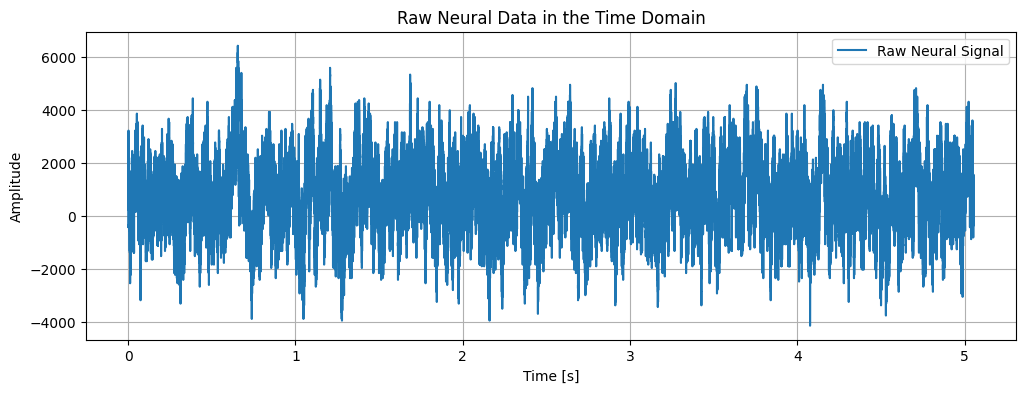

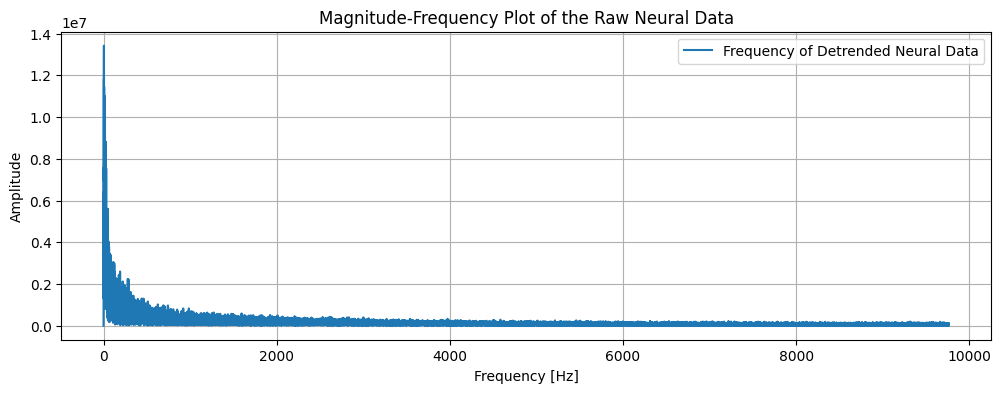

In [531]:
import wave
from glob import glob
from scipy.signal import butter, filtfilt

SAMPLE_RATE = 20000
data_dir = "../data/"

data_file_list = glob(data_dir + "*.wav")
data_file_list[0]

input_wav = wave.open(data_file_list[0], "rb")

print(f"input_wav.getframerate() [Sample Rate]: {input_wav.getframerate()}")
print(f"input_wav.getnframes() [Number of Samples]: {input_wav.getnframes()}")

sample_rate = input_wav.getframerate()
n_samples = input_wav.getnframes()

sample_bytes = input_wav.readframes(n_samples)
print(f"sample_bytes: {sample_bytes}")

# Calculating the time of the raw neural signal
time_endpoint = n_samples / sample_rate
time_array = np.arange(start=0, stop=time_endpoint, step=(1 / sample_rate))

signal_array = np.frombuffer(sample_bytes, dtype=np.int16)

# Detrend the Signal to Create Stationarity

signal_array_detrend = scipy.signal.detrend(signal_array)

# FFT of the signal
fft_signal = np.fft.fft(signal_array_detrend)
freq_bins_signal = np.arange(0, sample_rate / 2, step=sample_rate / (len(fft_signal)))

print(f"len(signal_array): {len(signal_array)}")
print(f"len(time_array): {len(time_array)}")

plt.figure(figsize=(12, 4))
plt.plot(time_array, signal_array)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Raw Neural Data in the Time Domain")
plt.legend(["Raw Neural Signal"])
plt.grid(True)
plt.show()

# FFT Plot
plt.figure(figsize=(12, 4))
plt.plot(
    freq_bins_signal[0 : len(freq_bins_signal) - 1],
    np.abs(fft_signal[0 : len(fft_signal) // 2]),
)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Magnitude-Frequency Plot of the Raw Neural Data")
plt.legend(["Frequency of Detrended Neural Data"])
plt.grid(True)
plt.show()

In [532]:
# Attenuating frequencies that are out of band:
# (below 500 Hz and above 5KHz)

# Low-Pass 5KHz Filter
# Filter parameters
cutoff_frequency = 5000  # cutoff frequency in Hz
fs = sample_rate  # Sampling Rate in Hz
order = 4  # Filter Order

# Design the low-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_frequency / nyq
b, a = butter(order, normal_cutoff, btype="lowpass")

# Apply the filter
filtered_data = filtfilt(b, a, signal_array_detrend)

# FFT of Filtered Data
filtered_data_fft = np.fft.fft(filtered_data)
freq_bins_filtered_data_fft = np.arange(0, fs / 2, step=(fs / len(filtered_data_fft)))

# High-Pass 500 Hz Filter
# Filter Parameters
cutoff_frequency = 500
fs = sample_rate
order = 4  # Filter Order

# Design the high-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_frequency / nyq
b, a = butter(order, normal_cutoff, btype="highpass")

# Apply the filter
filtered_data_high_and_low_pass = filtfilt(b, a, filtered_data)

# FFT of High-Pass Filtered Data
filtered_data_fft_high_and_low_pass = np.fft.fft(filtered_data_high_and_low_pass)
freq_bins_filtered_data_fft_high_and_low_pass = np.arange(
    0, fs / 2, step=(fs / len(filtered_data_fft_high_and_low_pass))
)

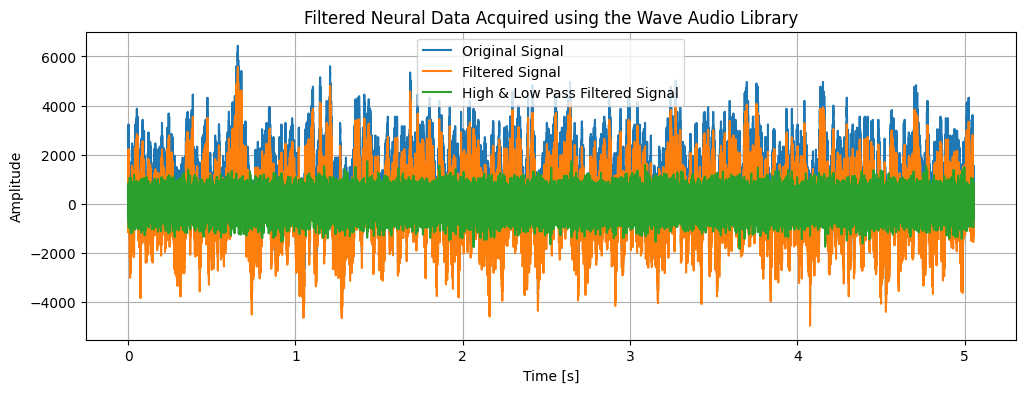

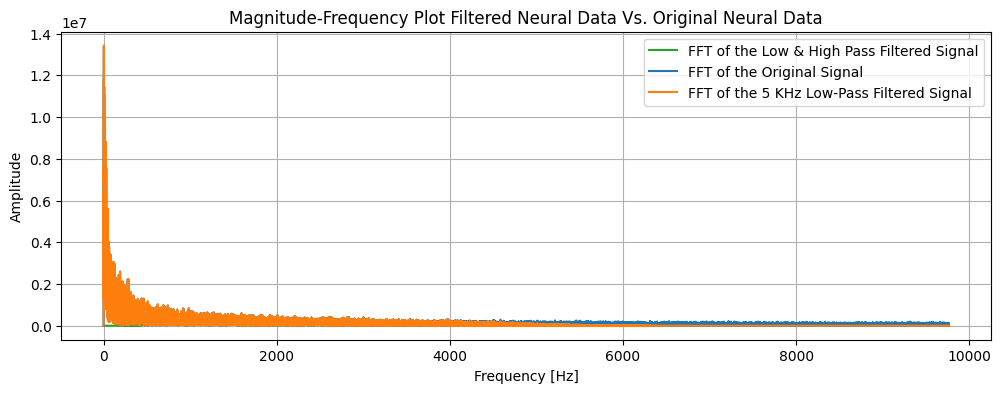

In [533]:
# Time Domain Plot
plt.figure(figsize=(12, 4))
plt.plot(
    time_array,
    signal_array,
    color=list(mcolors.TABLEAU_COLORS.keys())[0],
    label="Original Signal",
)
plt.plot(
    time_array,
    filtered_data,
    color=list(mcolors.TABLEAU_COLORS.keys())[1],
    label="Filtered Signal",
)
plt.plot(
    time_array,
    filtered_data_high_and_low_pass,
    color=list(mcolors.TABLEAU_COLORS.keys())[2],
    label="High & Low Pass Filtered Signal",
)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Filtered Neural Data Acquired using the Wave Audio Library")
plt.legend()
plt.grid(True)
plt.show()

# FFT Plot
plt.figure(figsize=(12, 4))
plt.plot(
    freq_bins_filtered_data_fft_high_and_low_pass[
        0 : len(freq_bins_filtered_data_fft_high_and_low_pass) - 1
    ],
    np.abs(
        filtered_data_fft_high_and_low_pass[
            0 : len(filtered_data_fft_high_and_low_pass) // 2
        ]
    ),
    color=list(mcolors.TABLEAU_COLORS.keys())[2],
    label="FFT of the Low & High Pass Filtered Signal",
)

plt.plot(
    freq_bins_signal[0 : len(freq_bins_signal) - 1],
    np.abs(fft_signal[0 : len(fft_signal) // 2]),
    color=list(mcolors.TABLEAU_COLORS.keys())[0],
    label="FFT of the Original Signal",
)
plt.plot(
    freq_bins_filtered_data_fft[0 : len(freq_bins_filtered_data_fft) - 1],
    np.abs(filtered_data_fft[0 : len(filtered_data_fft) // 2]),
    color=list(mcolors.TABLEAU_COLORS.keys())[1],
    label="FFT of the 5 KHz Low-Pass Filtered Signal",
)

plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Magnitude-Frequency Plot Filtered Neural Data" + " Vs. Original Neural Data")
plt.legend()
plt.grid(True)
plt.show()

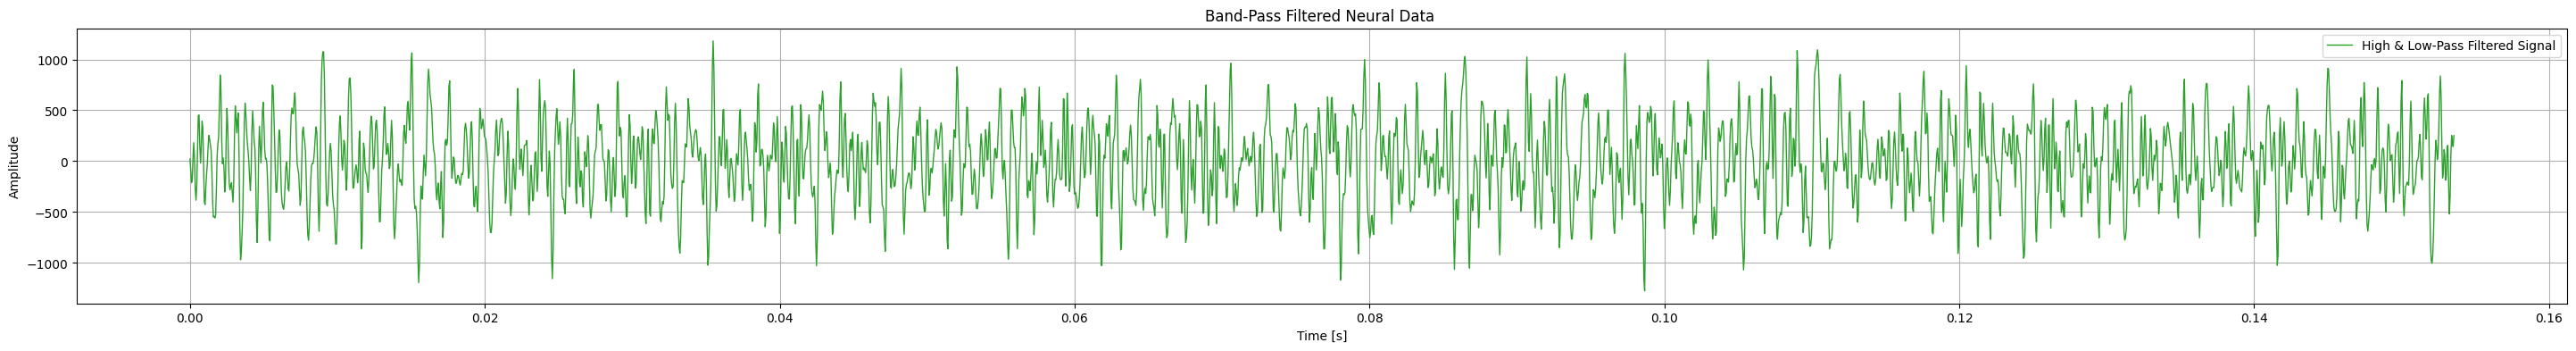

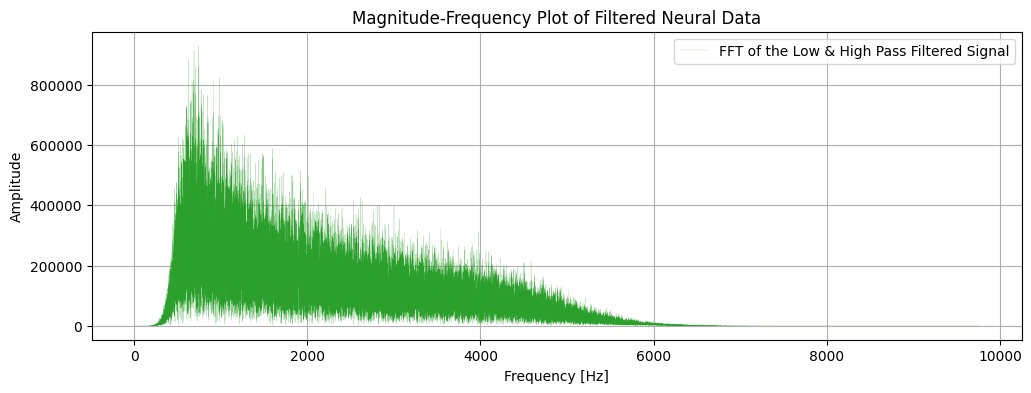

In [534]:
# Band-Pass Plots Only
# Time Domain Plot
plt.figure(figsize=(36, 4))
plt.plot(
    time_array[0:3000],
    filtered_data_high_and_low_pass[0:3000],
    color=list(mcolors.TABLEAU_COLORS.keys())[2],
    label="High & Low-Pass Filtered Signal",
    linewidth=1,
)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Band-Pass Filtered Neural Data ")
plt.legend()
plt.grid(True)
plt.show()

# FFT Plot
plt.figure(figsize=(12, 4))
plt.plot(
    freq_bins_filtered_data_fft_high_and_low_pass[
        0 : len(freq_bins_filtered_data_fft_high_and_low_pass) - 1
    ],
    np.abs(
        filtered_data_fft_high_and_low_pass[
            0 : len(filtered_data_fft_high_and_low_pass) // 2
        ]
    ),
    color=list(mcolors.TABLEAU_COLORS.keys())[2],
    label="FFT of the Low & High Pass Filtered Signal",
    linewidth=0.1,
)

plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Magnitude-Frequency Plot of Filtered Neural Data")
plt.legend()
plt.grid(True)
plt.show()

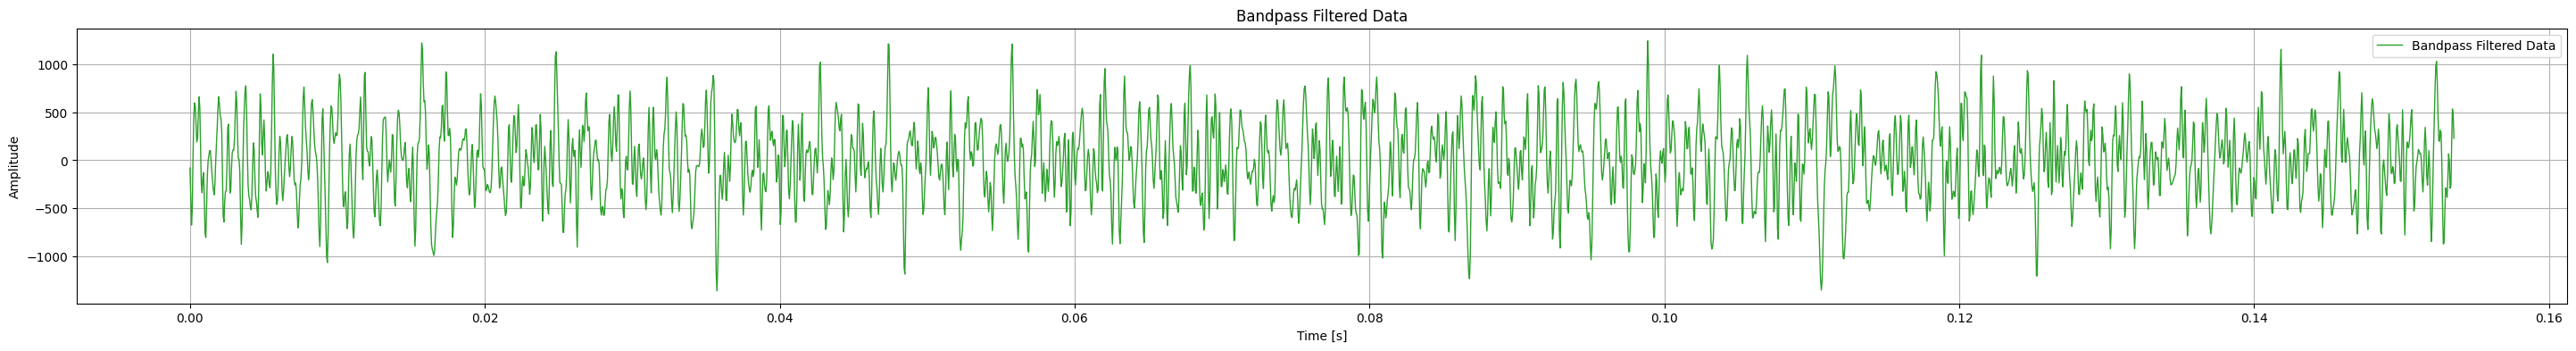

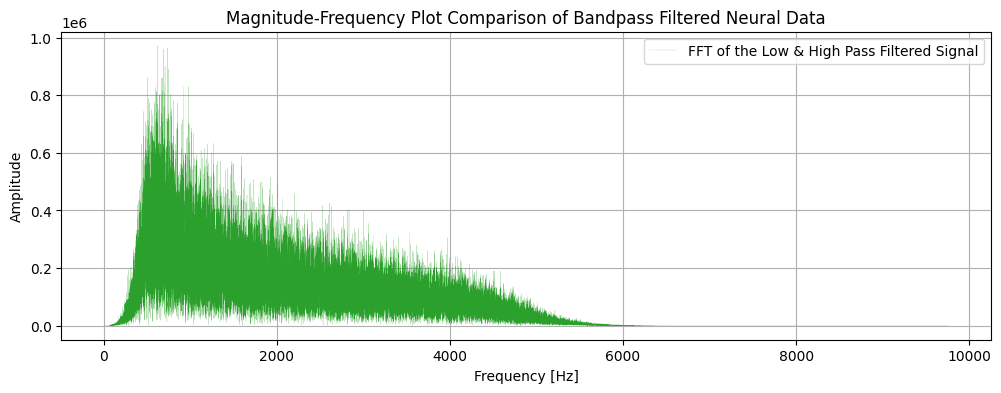

In [535]:
# Band-Pass Filter
nyq = sample_rate // 2
low_cutoff_freq = 500
high_cutoff_freq = 5000
low = low_cutoff_freq / nyq
high = high_cutoff_freq / nyq
order = 4
b, a = butter(order, [low, high], btype="band")

filtered_data_bandpass = lfilter(b, a, filtered_data)

filtered_data_bandpass_fft = np.fft.fft(filtered_data_bandpass)
freq_bins_filtered_data_bandpass_fft = np.arange(
    0, fs / 2, step=(fs / len(filtered_data_bandpass_fft))
)

# Time Domain Plot
plt.figure(figsize=(36, 4))
plt.plot(
    time_array[0:3000],
    filtered_data_bandpass[0:3000],
    color=list(mcolors.TABLEAU_COLORS.keys())[2],
    linewidth=1,
    label="Bandpass Filtered Data",
)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Bandpass Filtered Data")
plt.legend()
plt.grid(True)
plt.show()

# FFT Plot
plt.figure(figsize=(12, 4))
plt.plot(
    freq_bins_filtered_data_bandpass_fft[
        0 : len(freq_bins_filtered_data_bandpass_fft) - 1
    ],
    np.abs(filtered_data_bandpass_fft[0 : len(filtered_data_bandpass_fft) // 2]),
    color=list(mcolors.TABLEAU_COLORS.keys())[2],
    label="FFT of the Low & High Pass Filtered Signal",
    linewidth=0.1,
)

plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Magnitude-Frequency Plot Comparison of Bandpass Filtered Neural Data")
plt.legend()
plt.grid(True)
plt.show()

## Detecting the Noise Floor


In [536]:
WINDOW_SIZE = 5

In [563]:
def estimate_noise_floor(amplitude_array, window_size=WINDOW_SIZE):
    """This function will estimate the noise floor. The amplitude array
    must be at least of length of the window size or a single value.

    Args:
        amplitude_array (numpy.ndarray): Array of amplitudes with which
                                         to derive the noise floor.

        window_size (int, optional): This is the width of the window
                                     used to calculate a rolling median
                                     average.

    Return:
        noise_floor_estimate (np.ndarray): This is the estimate of the
                                           noise floor.
    """
    if len(amplitude_array) == 0:
        raise ValueError("Length of amplitude array must be greater than 0")
    elif len(amplitude_array) == 1:
        noise_floor_estimate = np.array(np.sqrt(np.abs(amplitude_array) ** 2))
        return noise_floor_estimate
    else:
        if len(amplitude_array) < window_size:
            window_size = len(amplitude_array)
        # power_of_filtered_data = np.abs(amplitude_array) * 2
        power_of_filtered_data = np.abs(amplitude_array) ** 2

        rolling_median_array = []
        for index in range(0, len(power_of_filtered_data), 1):
            current_median = np.median(
                power_of_filtered_data[index : index + window_size]
            )
            rolling_median_array.append(current_median)

        rolling_median_array = np.array(rolling_median_array)

        noise_floor_estimate = np.sqrt(rolling_median_array)

        return noise_floor_estimate

In [538]:
noise_floor_estimate = estimate_noise_floor(
    filtered_data_high_and_low_pass,
)
# Identifying The Noise Floor Threshold Maximum & Points Above the Threshold
noise_floor_threshold_maximum = (noise_floor_estimate).max()
noise_floor_threshold_maximum_inverse = -(noise_floor_threshold_maximum)
points_above_threshold_maximum = (
    np.real(filtered_data_high_and_low_pass) > noise_floor_threshold_maximum
)

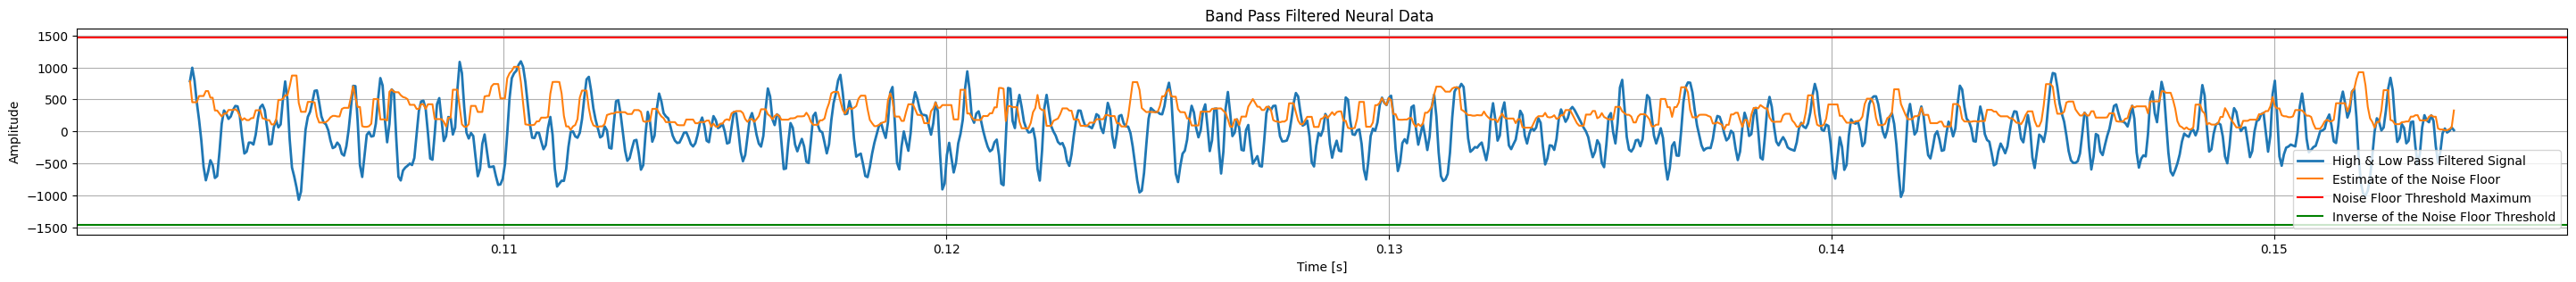

In [539]:
# Plot Window Variables
lw = 1
window_shift = 2000
window_size = 1000
start_window = 10
stop_window = start_window + window_size

# Time Domain Plot
plt.figure(figsize=(36, 3))
plt.plot(
    time_array[start_window + window_shift : stop_window + window_shift],
    filtered_data_high_and_low_pass[
        start_window + window_shift : stop_window + window_shift
    ],
    color=list(mcolors.TABLEAU_COLORS.keys())[0],
    label="High & Low Pass Filtered Signal",
    linewidth=2,
)

plt.plot(
    time_array[start_window + window_shift : stop_window + window_shift],
    noise_floor_estimate[start_window + window_shift : stop_window + window_shift],
    color=list(mcolors.TABLEAU_COLORS.keys())[1],
    label="Estimate of the Noise Floor",
)


plt.axhline(
    y=noise_floor_threshold_maximum,
    color="r",
    linestyle="-",
    label="Noise Floor Threshold Maximum",
)

plt.axhline(
    y=noise_floor_threshold_maximum_inverse,
    color="g",
    linestyle="-",
    label="Inverse of the Noise Floor Threshold",
)

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Band Pass Filtered Neural Data ")
plt.legend()
plt.grid(True)
plt.show()

## Spike Detection Module


In [540]:
index_start = 0
index_end = 100 * 2
sub_y_array = filtered_data_high_and_low_pass[index_start:index_end]
sub_x_array = time_array[index_start:index_end]

In [541]:
def identify_potential_initial_spikes(amplitude_array, return_local_maximum=True):
    """This function searches for peak amplitudes that may be initial
    neural spiking activity. This function is extended to filter the
    local maximum or minimum spiking activity. This is used to identify
    second or third spikes as well.

    Args:
        amplitude_array (numpy.ndarray): This contains an array of
                                         amplitudes of neural signal.
        return_local_maximum (bool, optional): This defines the logic of
                                               the returned values. If
                                               True, the values will be
                                               the local maximums of the
                                               amplitude array. When
                                               False,the returned list
                                               will be local minimums.

    Returns:
        list: This is a list of boolean values that indicate whether a
        point is a local maximum with respect to the next and previous
        amplitudes. If return_local_maximum is set to False, then the
        returned list contains information of local minimums instead.
    """
    if return_local_maximum:
        local_maximum_list = []
        for idx, val in enumerate(amplitude_array[0:-1]):
            if idx == 0:
                if amplitude_array[idx + 1] < val:
                    local_maximum_list.append(True)
                else:
                    local_maximum_list.append(False)
                continue
            if (amplitude_array[idx - 1] < val) and (val > amplitude_array[idx + 1]):
                local_maximum_list.append(True)
            else:
                local_maximum_list.append(False)
        if amplitude_array[-1] > amplitude_array[-2]:
            local_maximum_list.append(True)
        else:
            local_maximum_list.append(False)
        return local_maximum_list
    else:
        local_minimum_list = []
        for idx, val in enumerate(amplitude_array[0:-1]):
            if idx == 0:
                if amplitude_array[idx + 1] > val:
                    local_minimum_list.append(True)
                else:
                    local_minimum_list.append(False)
                continue
            if (amplitude_array[idx - 1] > val) and (val < amplitude_array[idx + 1]):
                local_minimum_list.append(True)
            else:
                local_minimum_list.append(False)
        if amplitude_array[-1] < amplitude_array[-2]:
            local_minimum_list.append(True)
        else:
            local_minimum_list.append(False)
        return local_minimum_list

In [542]:
local_maximum_list = identify_potential_initial_spikes(sub_y_array)

In [543]:
print(f'All indices are verified as either True or False: {
    len(sub_y_array) == len(local_maximum_list)}')

All indices are verified as either True or False: True


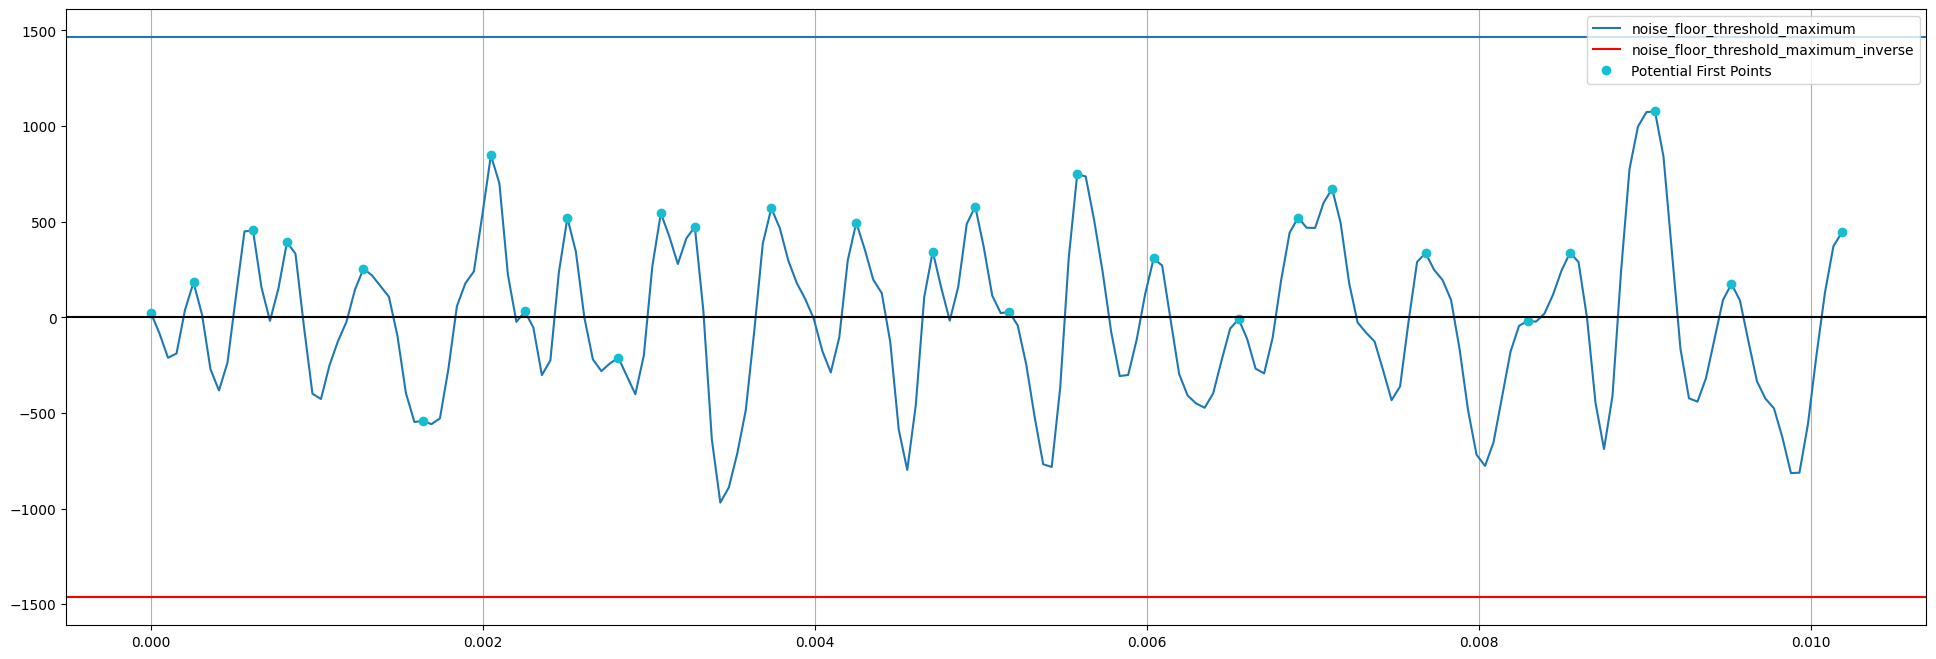

In [544]:
plt.figure(figsize=(24, 8))
# plt.plot(sub_x_array, sub_y_array, 'o')
plt.plot(sub_x_array, sub_y_array, "-")
plt.axhline(y=noise_floor_threshold_maximum, label="noise_floor_threshold_maximum")
plt.axhline(
    y=noise_floor_threshold_maximum_inverse,
    color="r",
    label="noise_floor_threshold_maximum_inverse",
)
# plt.axhline(y=0, color='black')
# plt.plot(sub_x_array[sub_y_array > noise_floor_threshold_maximum],
#          sub_y_array[sub_y_array > noise_floor_threshold_maximum],
#          'o',
#          label='Values Greater than the Noise Floor Threshold')
plt.plot(
    sub_x_array[local_maximum_list],
    sub_y_array[local_maximum_list],
    "o",
    color=list(mcolors.TABLEAU_COLORS.keys())[9],
    label="Potential First Points",
)
plt.axhline(y=0, color="black")
plt.legend()
plt.grid(True, axis="x")
plt.show()

## Applying Methods to EEG Data


### Importing EEG Data


In [545]:
import matplotlib.cbook as cbook

n_samples, n_rows = 800, 4
with cbook.get_sample_data("eeg.dat") as eegfile:
    data = np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))
t = 10 * np.arange(n_samples) / n_samples
eeg_data = data.T[0]

### Identifying Local Maximum


In [546]:
local_maximum_list_eeg = identify_potential_initial_spikes(eeg_data)

### Identifying Noise Floor


In [547]:
noise_floor_estimate = estimate_noise_floor(eeg_data)
# Identifying The Noise Floor Threshold Maximum & Points Above the Threshold
noise_floor_threshold_maximum = (noise_floor_estimate).max()
noise_floor_threshold_maximum_inverse = -(noise_floor_threshold_maximum)
points_above_threshold_maximum = (
    np.real(filtered_data_high_and_low_pass) > noise_floor_threshold_maximum
)

### Identify Potential Initial Spike Points (First Points)


In [548]:
# Identify Potential Initial Spike Points (First Points)
eeg_data_local_maximum_list = eeg_data[local_maximum_list_eeg]
t_local_maximum_list_eeg = t[local_maximum_list_eeg]

# # Identify Initial Spike Points above the noise floor maximum
# eeg_spikes_above_noise_floor_maximum = eeg_data_local_maximum_list[eeg_data_local_maximum_list > noise_floor_threshold_maximum]
# t_spikes_above_noise_floor_maximum = t_local_maximum_list_eeg[eeg_data_local_maximum_list > noise_floor_threshold_maximum]

### Identify Points Below the Inverse of the Noise Floor Estimate (Second points)


In [549]:
# Identifying all points below the inverse of the noise floor estimate
noise_floor_estimate_inverse = -(noise_floor_estimate)
eeg_data_below_noise_floor_estimate_inverse = eeg_data[
    eeg_data < noise_floor_estimate_inverse
]
t_data_below_noise_floor_estimate = t[eeg_data < noise_floor_estimate_inverse]

# Identifying Minimums below the inverse of the noise floor estimate
local_minimum_below_noise_floor_estimate = identify_potential_initial_spikes(
    eeg_data_below_noise_floor_estimate_inverse, return_local_maximum=False
)

eeg_data_below_noise_floor_estimate_minimum = (
    eeg_data_below_noise_floor_estimate_inverse[
        local_minimum_below_noise_floor_estimate
    ]
)
t_below_noise_floor_estimate_minimum = t_data_below_noise_floor_estimate[
    local_minimum_below_noise_floor_estimate
]

### Identify Spikes Above the Noise Floor Estimate (Third Points)


In [550]:
# Identify Spikes above the Noise Floor Estimate

# Identifying all points above the noise floor estimate
eeg_data_above_noise_floor_estimate = eeg_data[eeg_data > noise_floor_estimate]
t_data_above_noise_floor_estimate = t[eeg_data > noise_floor_estimate]

# Identifing Maximums above the noise floor estimate
local_maximum_above_noise_floor_estimate = identify_potential_initial_spikes(
    eeg_data_above_noise_floor_estimate
)

eeg_data_above_noise_floor_estimate_maximum = eeg_data_above_noise_floor_estimate[
    local_maximum_above_noise_floor_estimate
]
t_above_noise_floor_estimate_maximum = t_data_above_noise_floor_estimate[
    local_maximum_above_noise_floor_estimate
]

### Combining methods into spike detection module


In [551]:
def identify_potential_initial_spikes(amplitude_array, return_local_maximum=True):
    """This function searches for peak amplitudes that may be initial
    neural spiking activity. This function is extended to filter the
    local maximum or minimum spiking activity. This is used to identify
    second or third spikes as well.

    Args:
        amplitude_array (numpy.ndarray): This contains an array of
                                         amplitudes of neural signal.
        return_local_maximum (bool, optional): This defines the logic of
                                               the returned values. If
                                               True, the values will be
                                               the local maximums of the
                                               amplitude array. When
                                               False,the returned list
                                               will be local minimums.

    Returns:
        list: This is a list of boolean values that indicate whether a
        point is a local maximum with respect to the next and previous
        amplitudes. If return_local_maximum is set to False, then the
        returned list contains information of local minimums instead.
    """
    if len(amplitude_array) < 3:
        if len(amplitude_array) == 0:
            return ValueError("Length of amplitude array must be greater than 0")
        elif len(amplitude_array) == 1:
            return [True]
        else:
            if return_local_maximum:
                if amplitude_array[0] < amplitude_array[1]:
                    return [False, True]
                else:
                    return [True, False]
            else:
                if amplitude_array[0] < amplitude_array[1]:
                    return [True, False]
                else:
                    return [False, True]
    else:
        if return_local_maximum:
            local_maximum_list = []
            for idx, val in enumerate(amplitude_array[0:-1]):
                if idx == 0:
                    if amplitude_array[idx + 1] < val:
                        local_maximum_list.append(True)
                    else:
                        local_maximum_list.append(False)
                    continue
                if (amplitude_array[idx - 1] < val) and (
                    val > amplitude_array[idx + 1]
                ):
                    local_maximum_list.append(True)
                else:
                    local_maximum_list.append(False)
            if amplitude_array[-1] > amplitude_array[-2]:
                local_maximum_list.append(True)
            else:
                local_maximum_list.append(False)
            return local_maximum_list
        else:
            local_minimum_list = []
            for idx, val in enumerate(amplitude_array[0:-1]):
                if idx == 0:
                    if amplitude_array[idx + 1] > val:
                        local_minimum_list.append(True)
                    else:
                        local_minimum_list.append(False)
                    continue
                if (amplitude_array[idx - 1] > val) and (
                    val < amplitude_array[idx + 1]
                ):
                    local_minimum_list.append(True)
                else:
                    local_minimum_list.append(False)
            if amplitude_array[-1] < amplitude_array[-2]:
                local_minimum_list.append(True)
            else:
                local_minimum_list.append(False)
            return local_minimum_list

In [552]:
def estimate_noise_floor(amplitude_array, window_size=WINDOW_SIZE):
    """This function will estimate the noise floor. The amplitude array
    must be at least of length of the window size or a single value.

    Args:
        amplitude_array (numpy.ndarray): Array of amplitudes with which
                                         to derive the noise floor.

        window_size (int, optional): This is the width of the window
                                     used to calculate a rolling median
                                     average.

    Return:
        noise_floor_estimate (np.ndarray): This is the estimate of the
                                           noise floor.
    """
    if len(amplitude_array) == 0:
        raise ValueError("Length of amplitude array must be greater than 0")
    elif len(amplitude_array) == 1:
        noise_floor_estimate = np.array(np.sqrt(np.abs(amplitude_array) ** 2))
        return noise_floor_estimate
    else:
        if len(amplitude_array) < window_size:
            window_size = len(amplitude_array)
        # power_of_filtered_data = np.abs(amplitude_array) * 2
        power_of_filtered_data = np.abs(amplitude_array) ** 2

        rolling_median_array = []
        for index in range(0, len(power_of_filtered_data), 1):
            current_median = np.median(
                power_of_filtered_data[index : index + window_size]
            )
            rolling_median_array.append(current_median)

        rolling_median_array = np.array(rolling_median_array)

        noise_floor_estimate = np.sqrt(rolling_median_array)

        return noise_floor_estimate

In [553]:
def spike_detection(t, neural_data, sample_rate=(1 / 80)):
    """This function detects spikes in real-time.
    It returns an array of spikes at specific times and amplitudes with
    zeroed out noise.

    Args:
        t (array): This is the array of values that indicate the time of
                   each point in the neural_data array.
        neural_data (array): This is the array of amplitudes for each
                             point of time of the neural data.
        sample_rate (int, optional): This is the frequency at which the
                                     data was sampled.

    Returns:
        (list): This is the array inclusive of amplitudes of spikes at
                each specific point in the initial time array. Non-spike
                points have been replaced with amplitudes of zero value.
    """
    noise_floor_window = 5
    initial_first_point_of_spike_detected = False
    second_point_of_spike_detected = False
    third_point_of_spike_detected = False
    spike_train_time_index_list = []

    for current_time_index, time in enumerate(t):
        # Estimate the noise floor
        if current_time_index < noise_floor_window:
            current_noise_floor_estimate_list = estimate_noise_floor(
                [neural_data[current_time_index]]
            )
        else:
            current_noise_floor_estimate_list = estimate_noise_floor(
                neural_data[
                    current_time_index - noise_floor_window : current_time_index
                ],
                # window_size=noise_floor_window,
            )

        current_noise_floor_estimate = current_noise_floor_estimate_list[0]
        current_noise_floor_estimate_inverse = -(current_noise_floor_estimate)

        # Detect Initial First Point
        if initial_first_point_of_spike_detected == False:
            if current_time_index == 0:
                local_maximum_list_of_current_time_index = (
                    identify_potential_initial_spikes(
                        neural_data[current_time_index : current_time_index + 1]
                    )
                )
                is_current_time_index_local_maximum = (
                    local_maximum_list_of_current_time_index[0]
                )
            else:
                local_maximum_list_of_current_time_index = (
                    identify_potential_initial_spikes(
                        neural_data[current_time_index - 1 : current_time_index + 2]
                    )
                )
                is_current_time_index_local_maximum = (
                    local_maximum_list_of_current_time_index[1]
                )

            if is_current_time_index_local_maximum == True:
                # First Point Potentially Identified
                initial_first_point_of_spike_detected = True
                spike_time_index_first_point = current_time_index
        elif (
            second_point_of_spike_detected == False
            and initial_first_point_of_spike_detected == True
        ):
            # Detect Second Point
            local_minimum_list_of_current_time_index = (
                identify_potential_initial_spikes(
                    neural_data[current_time_index - 1 : current_time_index + 2],
                    return_local_maximum=False,
                )
            )
            is_current_time_index_local_minimum = (
                local_minimum_list_of_current_time_index[1]
            )
            if is_current_time_index_local_minimum == True:
                if (
                    neural_data[current_time_index]
                    < current_noise_floor_estimate_inverse
                ):
                    # Second Point Found
                    spike_time_index_list_first_to_second_points = np.arange(
                        start=spike_time_index_first_point,
                        stop=current_time_index,
                        step=1,
                    )
                    spike_time_index_second_point = current_time_index
                    second_point_of_spike_detected = True
                else:
                    initial_first_point_of_spike_detected = False
        elif (
            initial_first_point_of_spike_detected == True
            and second_point_of_spike_detected == True
            and third_point_of_spike_detected == False
        ):
            # Detect Third Point
            local_maximum_list_of_current_time_index = (
                identify_potential_initial_spikes(
                    neural_data[current_time_index - 1 : current_time_index + 2]
                )
            )
            is_current_time_index_local_maximum = (
                local_maximum_list_of_current_time_index[1]
            )
            if is_current_time_index_local_maximum == True:
                if neural_data[current_time_index] > current_noise_floor_estimate:
                    # Third Point Found
                    spike_time_index_list_second_to_third_points = np.arange(
                        spike_time_index_second_point, current_time_index + 1, step=1
                    )
                    third_point_of_spike_detected = True
                    time_index_of_most_recent_third_spike = current_time_index
                else:
                    initial_first_point_of_spike_detected = True
                    second_point_of_spike_detected = False
                    spike_time_index_first_point = current_time_index
        elif (
            initial_first_point_of_spike_detected == True
            and second_point_of_spike_detected == True
            and third_point_of_spike_detected == True
        ):
            # Detect Fourth Point
            if neural_data[current_time_index] < 0:
                time_index_of_most_recent_fourth_spike_point = current_time_index
                spike_time_index_list_third_to_fourth_points = np.arange(
                    time_index_of_most_recent_third_spike,
                    time_index_of_most_recent_fourth_spike_point + 1,
                    step=1,
                )
                spike_time_index_list = np.concatenate(
                    [
                        spike_time_index_list_first_to_second_points,
                        spike_time_index_list_second_to_third_points,
                        spike_time_index_list_third_to_fourth_points,
                    ]
                )
                spike_train_time_index_list.append(spike_time_index_list)

                initial_first_point_of_spike_detected = False
                second_point_of_spike_detected = False
                third_point_of_spike_detected = False
        else:
            raise ValueError("Error in Spike Detection State")

    return spike_train_time_index_list


spike_train_time_index_list = spike_detection(t=t, neural_data=eeg_data)

### Plotting Results


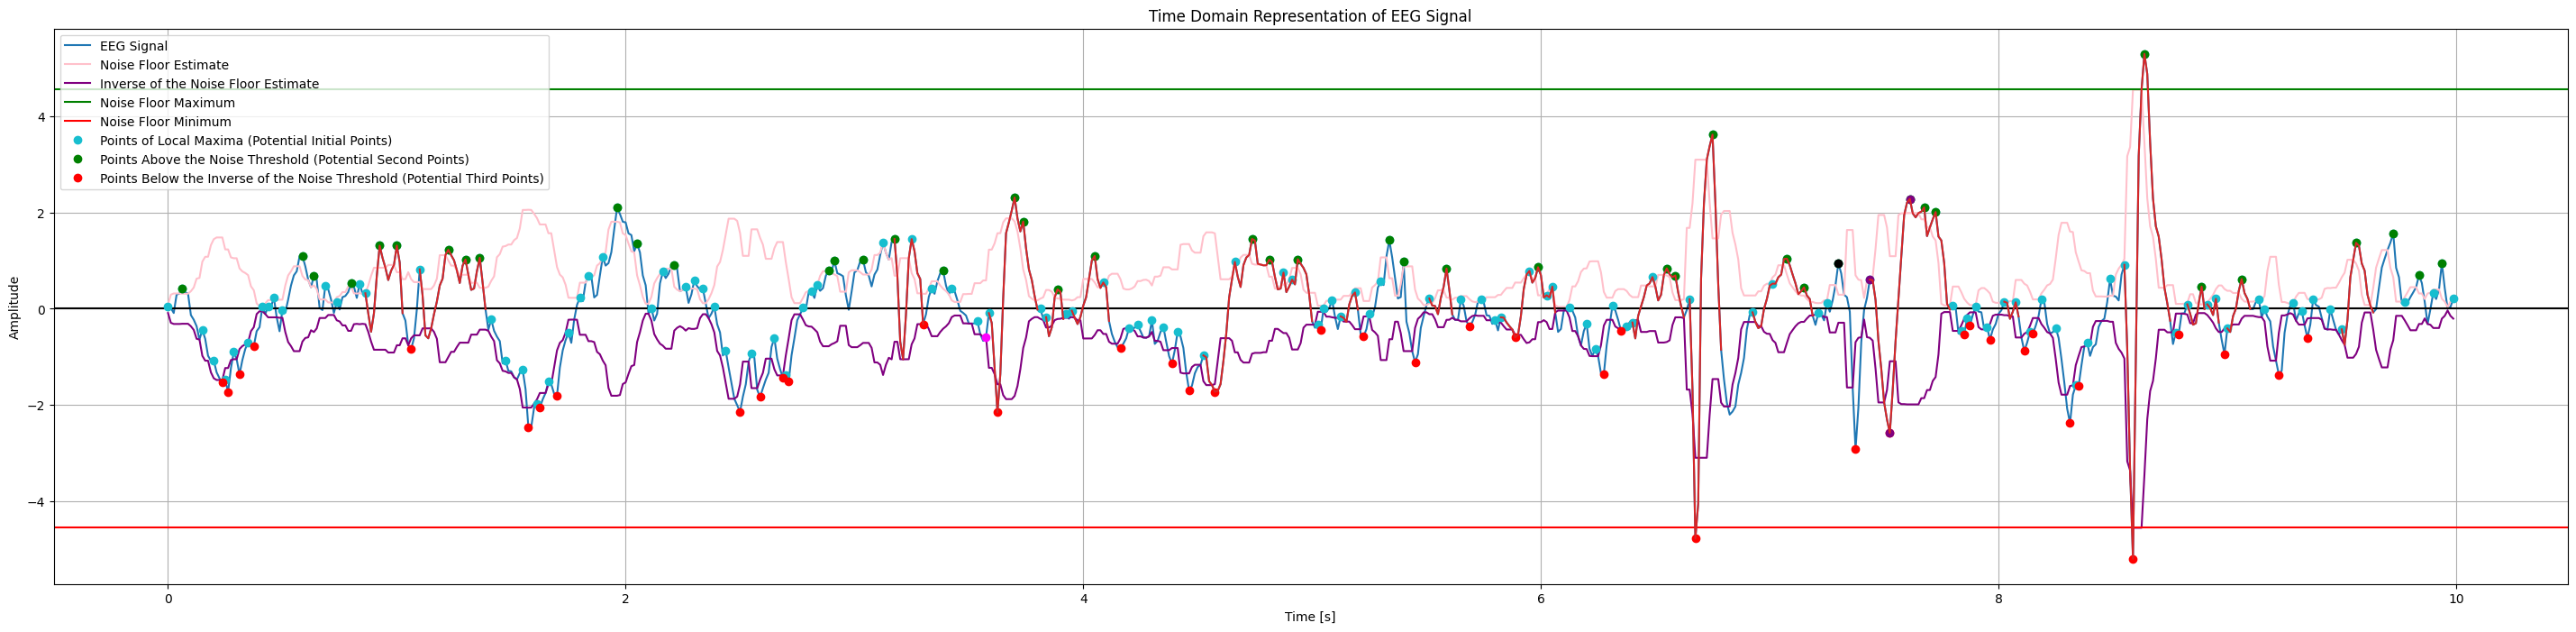

In [554]:
plt.figure(figsize=(36, 8))

# Time Domain Signals
plt.plot(t, eeg_data, label="EEG Signal")
plt.plot(t, noise_floor_estimate, label="Noise Floor Estimate", color="pink")
plt.plot(
    t,
    -noise_floor_estimate,
    label="Inverse of the Noise Floor Estimate",
    color="purple",
)

# Axis & Noise Floor Thresholds
plt.axhline(y=noise_floor_threshold_maximum, color="green", label="Noise Floor Maximum")
plt.axhline(
    y=noise_floor_threshold_maximum_inverse, color="red", label="Noise Floor Minimum"
)
plt.axhline(y=0, color="black")

# Thresholded Points
plt.plot(
    t_local_maximum_list_eeg,
    eeg_data_local_maximum_list,
    "o",
    color=list(mcolors.TABLEAU_COLORS.keys())[9],
    label="Points of Local Maxima (Potential Initial Points)",
)
plt.plot(
    t_above_noise_floor_estimate_maximum,
    eeg_data_above_noise_floor_estimate_maximum,
    "o",
    color="green",
    label="Points Above the Noise Threshold (Potential Second Points)",
)
plt.plot(
    t_below_noise_floor_estimate_minimum,
    eeg_data_below_noise_floor_estimate_minimum,
    "o",
    color="red",
    label="Points Below the Inverse of the Noise Threshold "
    + "(Potential Third Points)",
)

# Ploting Spike Points
first_spike_indices = [287, 290, 296]
second_spike_indices = [532, 534, 540]
third_spike_indices = [595, 602, 609]
fourth_spike_indices = [684, 687, 691]

inital_spike_index = 287
second_spike_index = 290
third_spike_index = 296

test_point = 286

# Test Point
plt.plot(t[test_point], eeg_data[test_point], "o", color="magenta")
plt.plot(
    t[third_spike_indices[0]], eeg_data[third_spike_indices[0]], "o", color="purple"
)
plt.plot(
    t[third_spike_indices[1]], eeg_data[third_spike_indices[1]], "o", color="purple"
)
plt.plot(
    t[third_spike_indices[2]], eeg_data[third_spike_indices[2]], "o", color="purple"
)

plt.plot(t[584], eeg_data[584], "o", color="black")

# # First Spike
# plt.plot(
#     t[spike_train_time_index_list[0]],
#     eeg_data[spike_train_time_index_list[0]],
#     "-",
#     color="magenta",
# )

# # Second Spike
# plt.plot(
#     t[spike_train_time_index_list[1]],
#     eeg_data[spike_train_time_index_list[1]],
#     "-",
#     color="magenta",
# )

# # Third Spike
# plt.plot(
#     t[spike_train_time_index_list[2]],
#     eeg_data[spike_train_time_index_list[2]],
#     "-",
#     color="magenta",
# )

# # Fourth Spike
# plt.plot(
#     t[spike_train_time_index_list[3]],
#     eeg_data[spike_train_time_index_list[3]],
#     "-",
#     color="magenta",
# )

# Detected Spikes
MAX_SPIKES_TO_PLOT = len(spike_train_time_index_list)
for SPIKE_NUMBER in range(0, MAX_SPIKES_TO_PLOT):
    plt.plot(
        t[spike_train_time_index_list[SPIKE_NUMBER]],
        eeg_data[spike_train_time_index_list[SPIKE_NUMBER]],
        "-",
        color=list(mcolors.TABLEAU_COLORS.keys())[3],
    )

# Plot Settings
plt.title("Time Domain Representation of EEG Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [555]:
def create_encoded_data(
    spike_train_time_index_list,
    neural_data,
    time_array_of_neural_data,
    sample_rate,
    number_of_samples,
):
    """This function creates an encoded version of the initial data.

    Args:
        spike_train_time_index_list (list): This is the list of array of
                                            floats that indicate indices
                                            of amplitudes.
        neural_data (array): These are the amplitudes of all values in
                             the dataset.
        time_array_of_neural_data (array): These are the points of time
                                           of the dataset.
        sample_rate (int): This is the sample rate of the data. The
                              samples are equidistant depending upon the
                              sampling frequency as calculated from the
                              inverse of the sample rate.
        number_of_samples (int): This is the total number of samples in
                                 the dataset.

    Returns:
        (list): This is the encoded data. This encoded data has the
                sample rate, the number of samples, the initial starting
                time of the first amplitude, and the information of the
                amplitudes of the detected eeg spikes. This pattern of
                the initial starting time of the first amplitude,
                represented as a float, followed by the array of
                amplitude values at each sample is repeated for each
                detected spike. It is implied that the samples are
                equidistant depending upon thesampling frequency as
                calculated from the inverse of thesample rate, that the
                length oftime of the entire datais inferred from the
                number of samplesdivided by thesample rate, and all
                amplitudes at samples notexplicitlydefined are to be
                considered noise and are therefore setto zero to
                reduce size while retaining information.
    """
    encoded_data = []
    encoded_data.append(sample_rate)
    encoded_data.append(number_of_samples)
    for spike_train_index in range(0, len(spike_train_time_index_list)):
        encoded_data.append(
            time_array_of_neural_data[spike_train_time_index_list[spike_train_index][0]]
        )
        encoded_data.append(neural_data[spike_train_time_index_list[spike_train_index]])
    return encoded_data


encoded_data = create_encoded_data(spike_train_time_index_list, eeg_data, t, 80, 800)

In [556]:
encoded_data

[80,
 800,
 0.8625,
 array([ 0.32101716, -0.09071883, -0.47786555, -0.09325582,  0.68152105,
         1.30934912,  1.30934912,  1.05574615,  0.85081311,  0.5952054 ,
         0.78787015,  0.90884747,  1.31067197,  0.96235811, -0.09177813]),
 1.1,
 array([ 0.81778806,  0.27753037, -0.55187038, -0.61353041, -0.40760763,
        -0.11220502,  0.14826507,  0.48060777,  0.62325449,  1.1159029 ,
         1.22233323,  1.22233323,  1.11069793,  1.00405996,  0.79409661,
         0.53385029,  0.89450523,  1.0214017 ,  0.70442949,  0.39082324,
         0.42002252,  0.77854955,  1.05707078,  0.53714476, -0.00863261]),
 3.175,
 array([ 1.44627736,  0.68555132, -0.68199923, -1.04954154, -0.13056126,
         1.04758147,  1.44534886,  1.44534886,  1.19405356,  0.73783796,
         0.61652381, -0.31971404]),
 3.5875,
 array([-0.09178145, -0.29556304, -1.22657072, -2.14960304, -1.35730181,
         0.21860041,  1.56715352,  1.79302273,  2.03964868,  2.30916349,
         2.30916349,  1.87539865,  1.6037

### Applying Methods To Neuralink Band-Pass Filtered Data


In [557]:
spike_train_time_index_list = spike_detection(time_array, filtered_data_bandpass)

In [558]:
len(spike_train_time_index_list)

3283

In [559]:
spike_train_time_index_list[0]

array([ 0,  1,  2,  3,  4,  5,  6,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [560]:
noise_floor_estimate = estimate_noise_floor(filtered_data_bandpass)

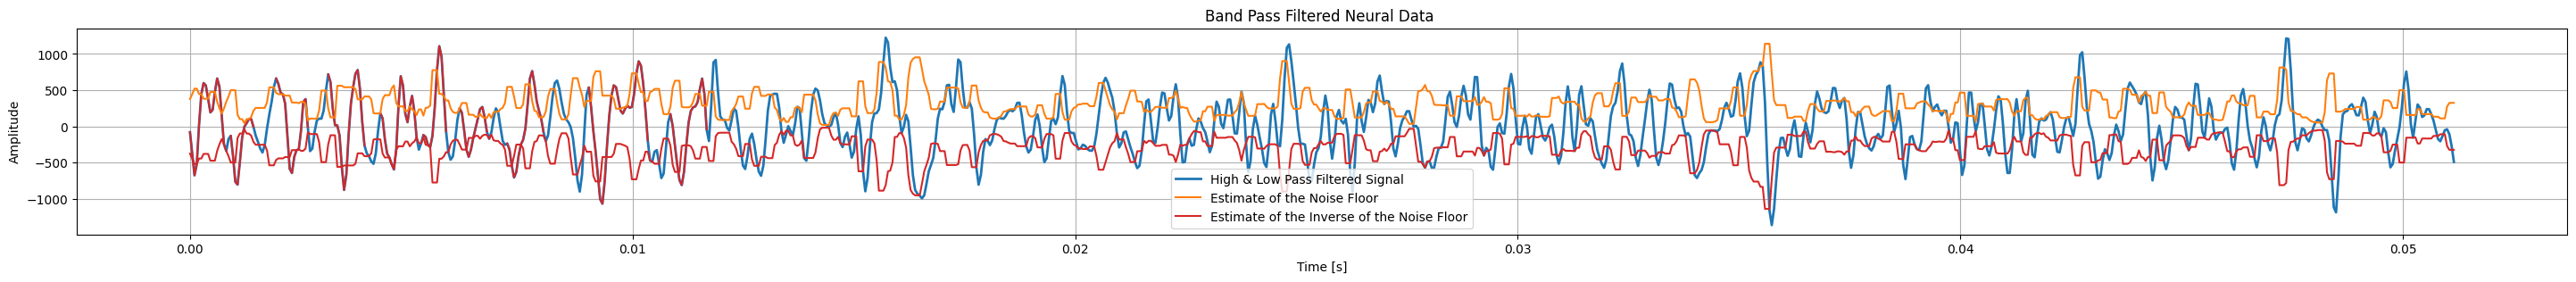

In [562]:
# Plot Window Variables
lw = 1
window_shift = 0
window_size = 1000
start_window = 0
stop_window = start_window + window_size

# Time Domain Plot
plt.figure(figsize=(36, 3))
plt.plot(
    time_array[start_window + window_shift : stop_window + window_shift],
    filtered_data_bandpass[start_window + window_shift : stop_window + window_shift],
    color=list(mcolors.TABLEAU_COLORS.keys())[0],
    label="High & Low Pass Filtered Signal",
    linewidth=2,
)


MAX_SPIKES_TO_PLOT = 10
for SPIKE_NUMBER in range(0, MAX_SPIKES_TO_PLOT):
    plt.plot(
        time_array[spike_train_time_index_list[SPIKE_NUMBER]],
        filtered_data_bandpass[spike_train_time_index_list[SPIKE_NUMBER]],
        "-",
        color=list(mcolors.TABLEAU_COLORS.keys())[3],
    )

plt.plot(
    time_array[start_window + window_shift : stop_window + window_shift],
    noise_floor_estimate[start_window + window_shift : stop_window + window_shift],
    color=list(mcolors.TABLEAU_COLORS.keys())[1],
    label="Estimate of the Noise Floor",
)

plt.plot(
    time_array[start_window + window_shift : stop_window + window_shift],
    -(noise_floor_estimate[start_window + window_shift : stop_window + window_shift]),
    color=list(mcolors.TABLEAU_COLORS.keys())[3],
    label="Estimate of the Inverse of the Noise Floor",
)

# plt.axhline(y=noise_floor_threshold_maximum,
#             color = 'r',
#             linestyle='-',
#             label='Noise Floor Threshold Maximum'
#             )

# plt.axhline(y=noise_floor_threshold_maximum_inverse,
#             color = 'g',
#             linestyle='-',
#             label='Inverse of the Noise Floor Threshold'
#             )

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Band Pass Filtered Neural Data ")
plt.legend()
plt.grid(True)
plt.show()

## Next Steps

- [ ] add these functions to the encoding python script
- [ ] test
- [ ] send solution to Neuralink Team
- [ ] add to resume as recent project work
